In [ ]:
import os 
from dotenv import load_dotenv
load_dotenv('C:/Users/midon/Documents/anomaly-detection-autoencoder-based-basic/.env.local')
PROJECT_PATH = os.getenv('PROJECT_PATH')
os.chdir(PROJECT_PATH)

import pandas as pd
import numpy as np
from preprocessing.preprocessing import * 
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
path = 'synthetic_data/synthetic_data.csv'
synth = SyntheticData(path)
final_data = feature_engineer(synth)
X = final_data.X_raw
y = final_data.y

print(final_data.X_raw.shape)


c:\Users\midon\Documents\anomaly-detection-autoencoder-based-basic\.venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Applying Yeo-Johnson transformations...
(233154, 17)


In [14]:
X

,DISBURSED_AMOUNT,PRI_CURRENT_BALANCE,SEC_CURRENT_BALANCE,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,SALARIED_FLAG,PRI_SANCTION_GAP,SEC_SANCTION_GAP,LTA_LTV,PRI_EMI_DISBURSED_RATIO,SEC_EMI_DISBURSED_RATIO,OUT_BALANCE_DISBURSED_RATIO,LTV,AGE_DISBURSMENT,VOTERID_FLAG,PERFORM_CNS_SCORE_DESCRIPTION
0,10.913034,-0.223488,0.009154,0.095310,0.09531,0.095310,0.741937,-0.097608,-0.367367,0.730170,0.095310,0.095310,-0.094720,87.090576,28,0,No Bureau History Available
1,10.802309,-0.138620,0.068433,0.095310,0.09531,0.095310,0.095310,-0.172071,0.328288,0.726666,5.980518,0.095310,-0.095805,74.673576,34,0,High Risk
2,10.973908,-0.211571,0.106135,0.095310,0.09531,0.095310,0.095310,-0.050506,-0.137989,0.728797,0.095310,0.095310,-0.097416,86.143990,31,0,No Bureau History Available
3,10.966112,-0.230574,0.035220,5.707442,0.09531,0.741937,0.095310,-0.172071,0.186012,0.733578,8.424522,0.197297,-0.097354,87.216530,27,0,Low Risk
4,10.730534,-0.230842,0.119769,0.095310,0.09531,0.095310,0.095310,0.000683,-0.394753,0.726947,0.167639,0.095310,-0.097857,84.725677,37,0,No Bureau History Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.094696,0.099380,0.033723,5.756059,0.09531,0.095310,0.741937,-0.065916,0.034463,0.730907,0.104692,0.195722,-0.097921,61.503872,31,1,Low Risk
233150,11.153147,-0.250102,0.014989,0.095310,0.09531,0.095310,0.095310,0.157558,0.027112,0.726402,5.855879,0.095310,-0.067537,72.461525,34,1,Low Risk
233151,10.373526,-0.207849,0.086949,0.095310,0.09531,0.095310,0.741937,-0.012205,-0.191457,0.725569,0.181511,0.095310,-0.097406,45.743809,44,0,No Bureau History Available
233152,10.518216,-0.194717,0.071463,0.095310,0.09531,0.095310,0.741937,-0.172071,0.024942,0.735949,7.520092,0.095310,-0.094128,45.589828,24,0,No Bureau History Available


In [ ]:
num_df = X[final_data.num_cols] #14 columns
correlation_matrix = num_df.corr()

In [22]:
correlation_matrix[correlation_matrix != 1].max()

DISBURSED_AMOUNT                0.509068
PRI_CURRENT_BALANCE             0.222051
SEC_CURRENT_BALANCE             0.017096
SEC_INSTAL_AMT                  0.381934
NEW_ACCTS_IN_LAST_SIX_MONTHS    0.320627
NO_OF_INQUIRIES                 0.320627
PRI_SANCTION_GAP                0.159225
SEC_SANCTION_GAP                0.159225
LTA_LTV                         0.359363
PRI_EMI_DISBURSED_RATIO         0.104985
SEC_EMI_DISBURSED_RATIO         0.381934
OUT_BALANCE_DISBURSED_RATIO     0.104985
LTV                             0.509068
AGE_DISBURSMENT                 0.113376
dtype: float64

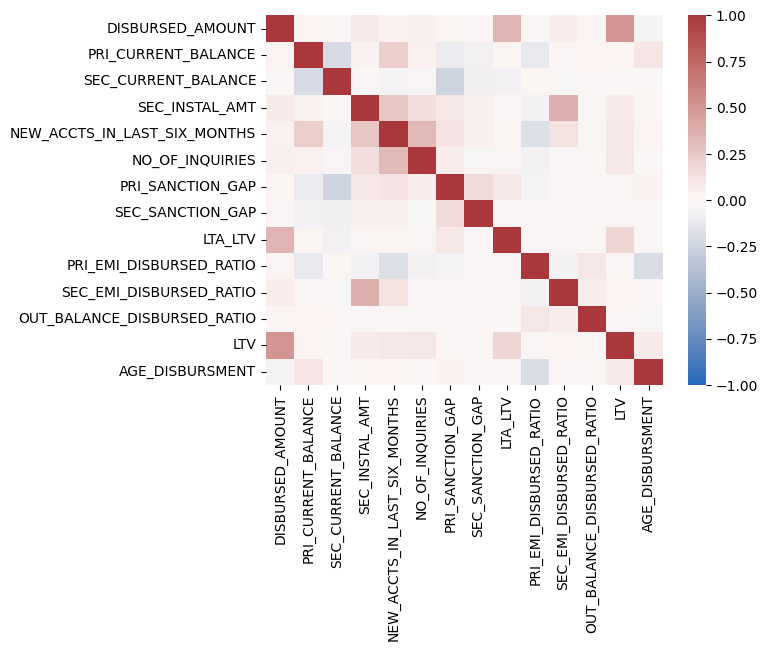

In [17]:
sns.heatmap(correlation_matrix, annot=False, cmap='vlag', vmin=-1, vmax=1, center=0)
plt.show()